<h4>Importing Libraries</h4>

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

<h4>Data Collection and Processing</h4>

In [90]:
gold_data = pd.read_csv("gld_price_data.csv")

In [91]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [92]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [93]:
gold_data.shape

(2290, 6)

In [94]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [95]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

<h4>Getting the Statistical Measures of the Data</h4>

In [96]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


<h4>Correlation</h4>

In [97]:
correlation = gold_data.corr()

<AxesSubplot:>

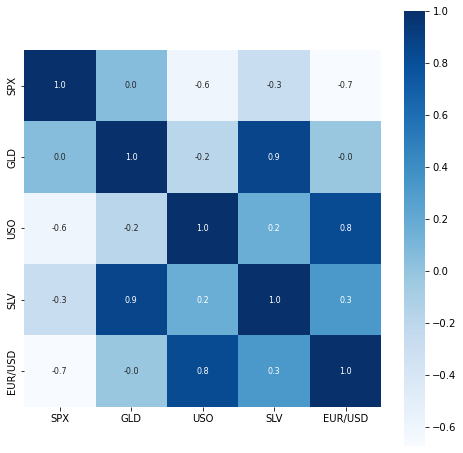

In [98]:
plt.figure(figsize = (8, 8))
sns.heatmap(correlation, cbar = True, square = True, fmt = '.1f', annot = True, annot_kws = {'size' : 8}, cmap = 'Blues')

In [99]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


c:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

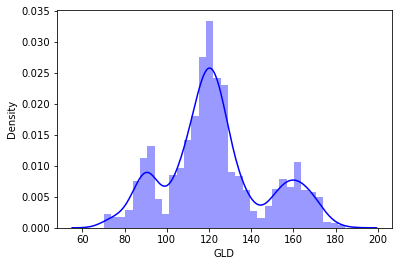

In [100]:
sns.distplot(gold_data['GLD'], color = 'blue')

<h4>Splitting the Features and the Target</h4>
<h6><i>In this GLD is the out put and SPX, SLV, EUR are the features</i></h6>

In [101]:
X = gold_data.drop(['Date', 'GLD'], axis = 1)
Y = gold_data['GLD']

In [102]:
print(X)
print(Y)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


<h4>Splitting into Train and Test Data</h4>

In [103]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

<h4>Model Training</h4>


In [104]:
regressor = RandomForestRegressor(n_estimators = 100)

In [105]:
regressor.fit(X_train, Y_train)

RandomForestRegressor()

<h4>Model Estimation</h4>


In [106]:
test_data_predict = regressor.predict(X_test)
print(test_data_predict)

[168.54479952  81.7022999  116.25849996 127.70130097 120.66130123
 154.96939804 149.87049831 126.08350026 117.58349871 126.00670097
 116.68690074 172.06420089 141.82589875 167.9382985  115.32399996
 117.47080039 140.04700257 170.02600106 159.88160331 159.6662992
 155.26270058 125.4371002  176.41029966 157.65290332 125.13010057
  93.86509986  77.2357002  120.79559993 119.08919898 167.53710034
  88.14810043 125.27150004  91.24280082 117.7153999  121.02459932
 135.72150017 115.36690106 115.08250088 147.51250032 107.41330091
 104.40670238  87.20789784 126.54790054 117.77949998 154.28069885
 119.65200012 108.2989999  108.05779807  93.11490053 127.13199783
  74.68290057 113.61799928 121.31950043 111.19329871 118.88119883
 120.98669928 159.02899923 167.47970093 147.05959686  85.77019849
  94.41680064  86.82209858  90.64059987 119.03620081 126.40120046
 127.4213003  169.37889966 122.31869915 117.33179928  98.57540033
 168.36280141 142.93549918 131.82430218 121.1817022  120.66719949
 119.674300

<h4>Compare the actual and predicted values</h4>


In [107]:
error_score = metrics.r2_score(test_data_predict, Y_test)
print("R Squared Error is : ", error_score)

R Squared Error is :  0.9895156395897855


In [108]:
Y_test = list(Y_test)

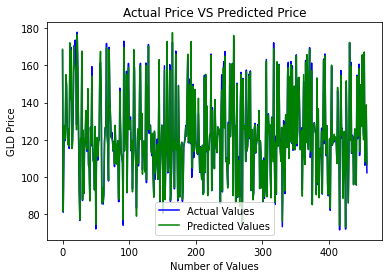

In [109]:
plt.plot(Y_test, color= 'blue', label = "Actual Values")
plt.plot(test_data_predict, color ='green', label= "Predicted Values")
plt.title("Actual Price VS Predicted Price")
plt.xlabel('Number of Values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()